# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что вовремя сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В таблице 22 столбца в основном численных форматов int64 И float64, также присутствуют форматы bool и object.  
В таблице 23699 строк, во многих столбцах присутствуют пропущенные значения. Необходимо изучить данные подробнее и понять, что делать с пропусками.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Данные загружены и изучены, класс

### Шаг 2. Предобработка данных

**1. Работа с датой и временем**  
Переведем данные в столбце first_day_exposition в формат даты и уберем пустые значения времени.

In [2]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**2. Проверка наличия дубликатов**  
Проверим наличие дубликатов, если их нет, то нам повезло.

In [3]:
data.duplicated().sum()

0

**3. Работа с пропусками**  
Изучим столбцы таблицы на наличие пропусков данных. В первую очередь обратим внимание на столбцы с параметрами, которые нужны для исследования - площадь, цена, число комнат, высота потолков.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В таблице есть случайные и неслучайные пропуски:  
  1. В столбцах locality_name и floors_total пропусков немного, поэтому строки с ними можно удалить на данном этапе;
  2. В столбце balcony пропуски могут связаны с отсутствием балконов в квартирах, заменим их на нули;
  3. В столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, ponds_nearest заполним пропуски медианными значениями в связи с их не очень большой важностью.
  4. В столбцах ceiling_height, living_area, kitchen_area пропусков очень много, данные в этих столбцах важны. Нужно будет думать, как их заполнить.
  5. 

* Удалим строки с пропусками в столбцах locality_name и floors_total*

In [5]:
data.dropna(subset = ['locality_name', 'floors_total'], inplace = True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

* В столбце balcony пропуски могут связаны с отсутствием балконов в квартирах, заменим их на нули;

In [6]:
data['balcony'] = data['balcony'].fillna(value=0) 
data['balcony'].value_counts()

0.0    15155
1.0     4187
2.0     3656
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

* В столбцах airports_nearest, parks_around3000, ponds_around3000, ponds_nearest заполним пропуски медианными значениями в связи с их не очень большой важностью.

In [7]:
#Найдем медианы для указанных столбцов
airports_nearest_median = data['airports_nearest'].median()
parks_around3000_median = data['parks_around3000'].median()
parks_nearest_median = data['parks_nearest'].median()
ponds_around3000_median = data['ponds_around3000'].median()
ponds_nearest_median = data['ponds_nearest'].median()

#Заменим пропуски на медианы
data['airports_nearest'] = data['airports_nearest'].fillna(airports_nearest_median)
data['parks_around3000'] = data['parks_around3000'].fillna(parks_around3000_median)
data['parks_nearest'] = data['parks_nearest'].fillna(parks_nearest_median)
data['ponds_around3000'] = data['ponds_around3000'].fillna(ponds_around3000_median)
data['ponds_nearest'] = data['ponds_nearest'].fillna(ponds_nearest_median)

#Изучим таблицу
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest      5501
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3171
dtype: int64

* Значения в столбце cityCenters_distance важны для дальнейшего анализа, пропусков в столбце много, значения между собой не связанные, поэтому примем решение не заменять их, а добавить столбец, в котором будет указано наличие или отсутствие значений и по которому вдальнейшем можно будет фильтровать таблицу

In [8]:
def cityCenters(row):
    cityCenters_dist = row['cityCenters_nearest']
    if cityCenters_dist > 0:
        return 1
    return 0
data['cityCenters_distance'] = data.apply(cityCenters, axis=1) 
cityCenters_good = data.query('cityCenters_distance == 1')
cityCenters_good.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,1
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,1
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1


* Изучим столбец is_apartment

In [9]:
data.is_apartment.value_counts(dropna = False)

NaN      20805
False     2710
True        50
Name: is_apartment, dtype: int64

В данном столбце в большинстве строк значения отсутствуют. В связи с тем, что в России количество апартаментов намного меньше количества квартир, заполним пропуски значением False.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(value=False) 
data.is_apartment.value_counts(dropna = False)

False    23515
True        50
Name: is_apartment, dtype: int64

* Изучим подробнее значения столбца ceiling_height

In [11]:
data.ceiling_height.value_counts(dropna=False)

NaN      9084
2.50     3515
2.60     1645
2.70     1571
3.00     1108
         ... 
26.00       1
3.88        1
3.29        1
3.83        1
3.58        1
Name: ceiling_height, Length: 184, dtype: int64

Построим гистограмму по данным из столбца

Медианная высота потолка: 2.65
Средняя высота потолка: 2.77


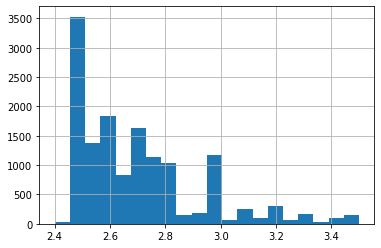

In [12]:
data['ceiling_height'].hist(bins=20, range=(2.4, 3.5))
print('Медианная высота потолка: {:.2f}'.format(data['ceiling_height'].median()))
print('Средняя высота потолка: {:.2f}'.format(data['ceiling_height'].mean()))

В столбце большое количество пустых значений. Заменить их на значение медианы или среднего нельзя, так как это очень сильно повлияет на выборку. Компромиссным решением будет заменить их с помощью метода interpolate по методу метод стохастической линейной регрессии. После этого проверим сильно ли изменилась гистограмма.

In [13]:
data2 = data.copy(deep=True)
data2['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
1355.0      1
873.0       1
730.0       1
976.0       1
773.0       1
Name: days_exposition, Length: 1139, dtype: int64

In [14]:
days_exposition_bad = data2.days_exposition.isna()
days_exposition_bad

0         True
1        False
2        False
3        False
4        False
         ...  
23694     True
23695    False
23696     True
23697    False
23698     True
Name: days_exposition, Length: 23565, dtype: bool

In [15]:
days_exposition_vals = data2[~days_exposition_bad].days_exposition.values.tolist()

In [16]:
random.shuffle(days_exposition_vals)

In [17]:
vals = len(days_exposition_vals)
vals

20394

In [18]:
data2.days_exposition = data2.days_exposition.apply(lambda x : days_exposition_vals[random.randint(0,vals-1)] if x!=x else x)

In [19]:
data2['days_exposition'].value_counts()

45.0     1031
60.0      644
7.0       281
30.0      238
90.0      230
         ... 
730.0       1
873.0       1
793.0       1
768.0       1
773.0       1
Name: days_exposition, Length: 1139, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


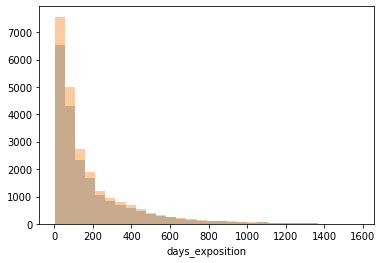

In [20]:
sns.distplot(data['days_exposition'], kde=False, bins=30)
sns.distplot(data2['days_exposition'], kde=False, bins=30)
plt.show()

Медианная высота потолка: 2.66
Средняя высота потолка: 2.77


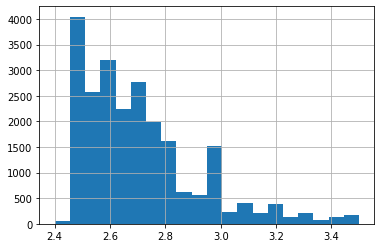

In [21]:
data['ceiling_height'] = data['ceiling_height'].interpolate(method ='slinear', limit_direction ='forward')
data['ceiling_height'].hist(bins=20, range=(2.4, 3.5))
print('Медианная высота потолка: {:.2f}'.format(data['ceiling_height'].median()))
print('Средняя высота потолка: {:.2f}'.format(data['ceiling_height'].mean()))

Общий рисунок гистограммы не изменился. Медиана и среднее значение тоже. Остановимся на примененном методе заполнения пропусков.

Видим наличие неадекватных данных, неапример, высота потолков 27.50 и 100 метров. Отсортируем столбец по возрастанию и убыванию.

In [22]:
data['ceiling_height'].sort_values(ascending=False).head()

22869    100.0
22336     32.0
3148      32.0
21377     27.5
22938     27.0
Name: ceiling_height, dtype: float64

In [23]:
data['ceiling_height'].sort_values(ascending=True).head()

22590    1.00
5712     1.20
16934    1.75
22960    2.00
5850     2.00
Name: ceiling_height, dtype: float64

Примем, что минимальная высота потолка в квартире может быть 2.40 (2.50 за вычетом опускания потолка при ремонте), а максимальная высота - 4.5 метров. Значения вне этих пределов удалим. 

In [24]:
data = data.query('2.4 < ceiling_height < 4.5')
data['ceiling_height'].sort_values(ascending=False).head()

7521     4.45
8018     4.45
7274     4.40
6728     4.40
11651    4.40
Name: ceiling_height, dtype: float64

* Изучим подробнее значения столбцов kitchen_area и living_area

In [25]:
filtered_data = data.loc[data['kitchen_area'].isna()]
filtered_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_distance
3,0,64900000.0,159.0,2015-07-24,3,2.947500,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,1
30,12,2200000.0,32.8,2018-02-19,1,2.833333,9.0,NaN,2,False,...,0.0,Коммунар,26757.0,NaN,0.0,455.0,1.0,503.0,63.0,0
37,10,1990000.0,45.8,2017-10-28,2,2.500000,5.0,NaN,1,False,...,0.0,поселок городского типа Красный Бор,26757.0,NaN,0.0,455.0,1.0,503.0,196.0,0
44,13,5350000.0,40.0,2018-11-18,1,2.825000,22.0,NaN,3,False,...,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,1
59,15,6300000.0,46.5,2017-03-06,1,2.650000,13.0,NaN,13,False,...,0.0,Санкт-Петербург,11125.0,14501.0,0.0,455.0,0.0,503.0,336.0,1


Пропуски в столбце kitchen_area практически всегда совпадают с пропусками в столбце living_area.  
Найдем среднее соотношение общей площади к жилой и к площади кухни и заполним пропуски.

In [26]:
la_ratio = (data['living_area'] / data['total_area']).mean()
ka_ratio = (data['kitchen_area'] / data['total_area']).mean()
print('Среднее отношение жилой площади к общей: {:.1%}'.format(la_ratio))
print('Среднее отношение площади кухни к общей: {:.1%}'.format(ka_ratio))

Среднее отношение жилой площади к общей: 56.5%
Среднее отношение площади кухни к общей: 18.7%


Заполним пустые значения в столбцах kitchen_area и living_area.

In [27]:
data['living_area'] = data['living_area'].fillna(data['total_area']*la_ratio)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*ka_ratio)
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest     5451
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3150
cityCenters_distance       0
dtype: int64

В столбце days_exposition пропуски могут быть связан с тем, что квартира до сих пор не продана.  
В связи с тем, что этот столбец важен для исследования, значения столбца нельзя экстраполировать друг на друга и количество пропусков не критичное, удалим строки с пропусками.

In [28]:
data.dropna(subset = ['days_exposition'], inplace = True)
data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20280 entries, 1 to 23697
Data columns (total 23 columns):
total_images            20280 non-null int64
last_price              20280 non-null float64
total_area              20280 non-null float64
first_day_exposition    20280 non-null datetime64[ns]
rooms                   20280 non-null int64
ceiling_height          20280 non-null float64
floors_total            20280 non-null float64
living_area             20280 non-null float64
floor                   20280 non-null int64
is_apartment            20280 non-null bool
studio                  20280 non-null bool
open_plan               20280 non-null bool
kitchen_area            20280 non-null float64
balcony                 20280 non-null float64
locality_name           20280 non-null object
airports_nearest        20280 non-null float64
cityCenters_nearest     15684 non-null float64
parks_around3000        20280 non-null float64
parks_nearest           20280 non-null float64
ponds_a

* Изучим названия населенных пунктов.

In [29]:
data['locality_name'].unique()

array(['посёлок Шушары', 'Санкт-Петербург', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Кингисепп', 'Сестрорецк',
       'деревня Куттузи', 'поселок городского типа Ефимовский',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'Приозерск',
       'Сланцы', 'село Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'поселок Новый Свет',
       'деревня Оржицы', 'деревня Кальтино', 'поселок 

Мы видим, что в названиях населенных пунктов встречаются их типы, написанные разными способами. Уберем эти типы из названий.  
Для этого сначала создадим множество наиболее часто встречающихся типов, затем с помощью функции удалим их из названий населенных пунктов.

In [30]:
data['locality_name'] = data['locality_name'].astype('str')

types = {'посёлок','городской','деревня',
         'поселок','городского','типа','садовое','товарищество','село','станции','город',
         'коттеджный', 'при', 'железнодорожной'}
def name(text):
    line = set(text.split())
    loc_name = line - types
    return str(loc_name)[2:-2]

data['loc_name'] = data['locality_name'].apply(name)
data['loc_name'].value_counts()

Санкт-Петербург    13511
Мурино               543
Кудрово              437
Шушары               407
Всеволожск           339
                   ...  
Рабитицы               1
Пельгора               1
Шпаньково              1
Цвылёво                1
Тихковицы              1
Name: loc_name, Length: 279, dtype: int64

* Проверим значение столбца rooms

In [31]:
data['rooms'].value_counts()

1     7197
2     6825
3     4770
4      928
5      248
0      178
6       74
7       36
8       11
9        4
14       2
10       2
19       1
11       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Видим некорретные значения 0. Удалим их.

In [32]:
data = data.loc[data['rooms'] != 0]
data = data.loc[data['rooms'] < 9]
cityCenters_good = cityCenters_good.loc[cityCenters_good['rooms'] != 0]
cityCenters_good = cityCenters_good.loc[cityCenters_good['rooms'] < 9]
data = data.reset_index(drop=True)
cityCenters_good = cityCenters_good.reset_index(drop=True)
data['rooms'].value_counts()

1    7197
2    6825
3    4770
4     928
5     248
6      74
7      36
8      11
Name: rooms, dtype: int64

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу

**Посчитаем стоимость квадратного метра для каждого объявления и добавим в отдельный столбец**

In [33]:
msq_price = data['last_price'] / data['total_area']
data['msq_price'] = round(msq_price, 2)
cityCenters_good['msq_price'] = round(msq_price, 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_distance,loc_name,msq_price
0,7,3350000.0,40.4,2018-12-04,1,2.7825,11.0,18.600000,1,False,...,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,1,Шушары,82920.79
1,10,5196000.0,56.0,2015-08-20,2,2.8650,5.0,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1,Санкт-Петербург,92785.71
2,0,64900000.0,159.0,2015-07-24,3,2.9475,14.0,89.796259,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,1,Санкт-Петербург,408176.10
3,2,10000000.0,100.0,2018-06-19,2,3.0300,14.0,32.000000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1,Санкт-Петербург,100000.00
4,10,2890000.0,30.4,2018-09-10,1,2.9240,12.0,14.400000,5,False,...,26757.0,NaN,0.0,455.0,1.0,503.0,55.0,0,Янино-1,95065.79


**Создадим столбцы с указанием дня недели, месяца и года публикации объявления**

In [34]:
data['weekday_number'] = data['first_day_exposition'].dt.weekday
cityCenters_good['weekday_number'] = cityCenters_good['first_day_exposition'].dt.weekday
def weekday(row):
    weekday_name = row['weekday_number']
    if weekday_name == 0:
        return 'понедельник'
    if weekday_name == 1:
        return 'вторник'
    if weekday_name == 2:
        return 'среда'
    if weekday_name == 3:
        return 'четверг'
    if weekday_name == 4:
        return 'пятница'
    if weekday_name == 5:
        return 'суббота'
    if weekday_name == 6:
        return 'воскресенье'
data['weekday_name'] = data.apply(weekday, axis=1) 
cityCenters_good['weekday_name'] = cityCenters_good.apply(weekday, axis=1) 
data['weekday_name'].value_counts()

четверг        3693
вторник        3547
пятница        3444
среда          3343
понедельник    2988
суббота        1632
воскресенье    1442
Name: weekday_name, dtype: int64

In [35]:
cityCenters_good['month_number'] = cityCenters_good['first_day_exposition'].dt.month
data['month_number'] = data['first_day_exposition'].dt.month
def month(row):
    month_name = row['month_number']
    if month_name == 1:
        return 'январь'
    if month_name == 2:
        return 'февраль'
    if month_name == 3:
        return 'март'
    if month_name == 4:
        return 'апрель'
    if month_name == 5:
        return 'май'
    if month_name == 6:
        return 'июнь'
    if month_name == 7:
        return 'июль'
    if month_name == 8:
        return 'август'
    if month_name == 9:
        return 'сентябрь'
    if month_name == 10:
        return 'октябрь'
    if month_name == 11:
        return 'ноябрь'
    if month_name == 12:
        return 'декабрь'
data['month_name'] = data.apply(month, axis=1) 
cityCenters_good['month_name'] = cityCenters_good.apply(month, axis=1) 
data['month_name'].value_counts()

февраль     2249
ноябрь      2104
март        1937
октябрь     1891
сентябрь    1804
июнь        1656
август      1582
июль        1543
апрель      1488
декабрь     1447
январь      1258
май         1130
Name: month_name, dtype: int64

In [36]:
data['year'] = data['first_day_exposition'].dt.year
cityCenters_good['year'] = cityCenters_good['first_day_exposition'].dt.year
data['year'].value_counts()

2017    7740
2018    7418
2016    2656
2015    1087
2019    1071
2014     117
Name: year, dtype: int64

**Создадим столбец с указанием этажа квартиры — первый, последний, другой.**

In [37]:
def floor_type(row):
    floor_n = row['floor']
    floors_total_n = row['floors_total']
    if floor_n == 1:
        return 'первый'
    if floor_n == floors_total_n:
        return 'последний'
    return 'другой'

data['floor_name'] = data.apply(floor_type, axis=1) 
cityCenters_good['floor_name'] = cityCenters_good.apply(floor_type, axis=1)
data['floor_name'].value_counts()

другой       14887
последний     2775
первый        2427
Name: floor_name, dtype: int64

**Создадим столбцы с соотношением жилой и общей площади и площади кухни к общей.**

In [38]:
#Столбец с с соотношением жилой и общей площади
data['la_ratio'] = round(data['living_area'] / data['total_area'], 2)
#Столбец с с соотношением площади кухни к общей
data['ka_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 33 columns):
total_images            20089 non-null int64
last_price              20089 non-null float64
total_area              20089 non-null float64
first_day_exposition    20089 non-null datetime64[ns]
rooms                   20089 non-null int64
ceiling_height          20089 non-null float64
floors_total            20089 non-null float64
living_area             20089 non-null float64
floor                   20089 non-null int64
is_apartment            20089 non-null bool
studio                  20089 non-null bool
open_plan               20089 non-null bool
kitchen_area            20089 non-null float64
balcony                 20089 non-null float64
locality_name           20089 non-null object
airports_nearest        20089 non-null float64
cityCenters_nearest     15563 non-null float64
parks_around3000        20089 non-null float64
parks_nearest           20089 non-null float64
ponds_a

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**1. Изучение параметров: площадь, цена, число комнат, высота потолков**

В начале анализа архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим гистограммы для каждого параметра.

**Гистограмма по параметру площадь квартиры**

Создадим функцию для построения гистограммы.

In [39]:
def graph_hist(data, column, bins, xlabel, ylabel):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    fig, ax = plt.subplots()
    column.plot(kind = 'hist', bins = bins, grid = True,
                       range = (Q1 - IQR, Q3 + 3*IQR), figsize = (7, 4)
                      )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

Медианная площадь квартиры: 51.00
Средняя площадь квартиры: 58.85


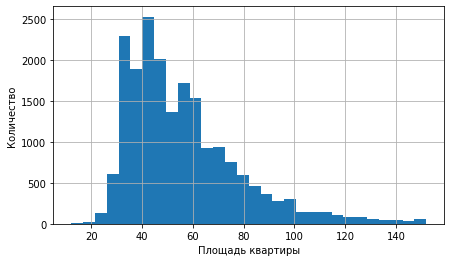

In [40]:
graph_hist(data, data['total_area'], 30, 'Площадь квартиры', 'Количество')
print('Медианная площадь квартиры: {:.2f}'.format(data['total_area'].median()))
print('Средняя площадь квартиры: {:.2f}'.format(data['total_area'].mean()))

Распределение квартир по площади похоже на распределение Пуассона. Некоторые всплески обусловлены типизацией квартир в России.  
Начиная, примерно, с площади в 60кв.м количетсво квартир равномерно падает, после 150кв.м. составляя практически статистическую погрешность.

**Гистограмма по параметру цена квартиры**

Медианная цена продажи квартиры: 4550000.00
Средняя цена продажи квартиры: 6233296.36


count    2.008900e+04
mean     6.233296e+06
std      1.040872e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

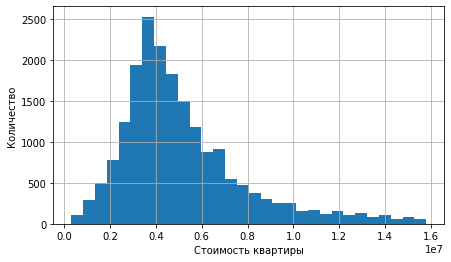

In [41]:
graph_hist(data, data['last_price'], 30, 'Стоимость квартиры', 'Количество')
print('Медианная цена продажи квартиры: {:.2f}'.format(data['last_price'].median()))
print('Средняя цена продажи квартиры: {:.2f}'.format(data['last_price'].mean()))
data['last_price'].describe()

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Подпиши оси на всех графиках


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо

Распределение квартир по цене также похоже на распределение Пуассона. Стандартное отклонение небольшое. Следовательно с выборкой все в порядке.

**График по параметру количество комнат**

Медианное количество комнат: 2.00


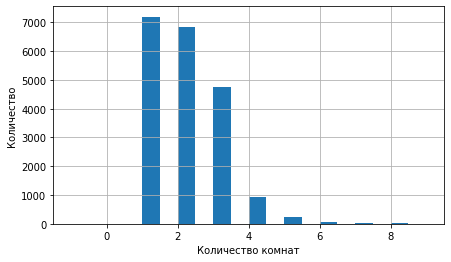

In [42]:
graph_hist(data, data['rooms'], 20, 'Количество комнат', 'Количество')
print('Медианное количество комнат: {:.2f}'.format(data['rooms'].median()))

Распределение по количеству комнат также является распределением Пуассона. Наибольшее количество квартир однокомнатные. Медианным количество комнат является 2 комнаты.

**Гистограмма по параметру высота потолков в квартире**

Медианная высота потолка: 2.65
Средняя высота потолка: 2.72


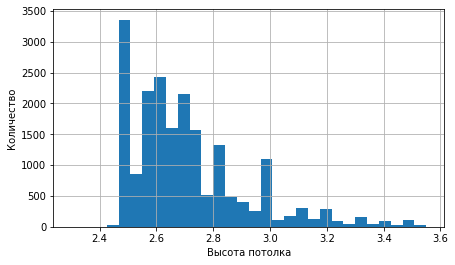

In [43]:
graph_hist(data, data['ceiling_height'], 30, 'Высота потолка', 'Количество')
print('Медианная высота потолка: {:.2f}'.format(data['ceiling_height'].median()))
print('Средняя высота потолка: {:.2f}'.format(data['ceiling_height'].mean()))

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Надо оптимизировать построение однотипных графиков (например строить их в цикле или написать функцию)


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

верно

В базе данных было очень много пропущенных значений высоты потолка, которые мы заменили с помощью метода стохастической линейной регрессии. После замены гистограмма столбца изменилась не сильно, все ключевые показатели остались практически неизменны. Гистограмма по аналогии с гистограммой площади квартир похожа на распределение Пуассона с некоторыми выбивающимися значениями, которые являются следствием типизации при строительстве жилых домов.

**2. Изучение параметра время продажи квартиры**

count    20089.000000
mean       181.288665
std        220.088138
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

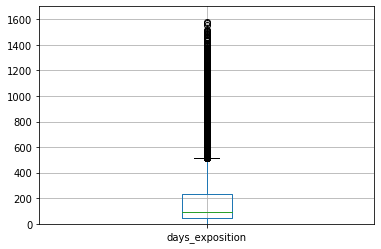

In [44]:
plt.ylim(0, 1700)
data.boxplot('days_exposition')
data['days_exposition'].describe()

На графике "ящик с усами" видно, что нижний ус упирается в 0, верхний расположен около 500 дней.   
Максимальное значение при этом 1580 дней, что равно примерно 4,5 годам. Минимальное значение равно 1 дню - оба значения очень необычны и скорее всего являются выбросами.
Медианным временем продажи квартиры является 96 дней, что достаточно правдоподобно.
Среднеквадратичное отклонение выборки очень большое. Для того, чтобы понять, можно ли удалить какие-либо значения, построим гистограмму параметра. 

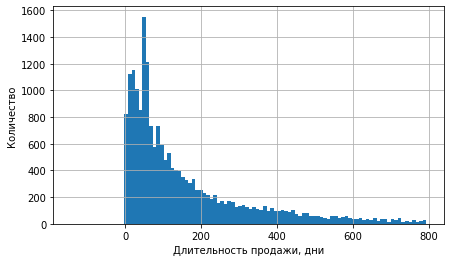

In [45]:
graph_hist(data, data['days_exposition'], 100, 'Длительность продажи, дни', 'Количество')

Судя по гистограмме длительность продажи квартиры более 800 дней встречается довольно редко. С точки зрения здравого смысла, строки с данными значениями можно удалить.

In [46]:
days_exposition_good = data.query('days_exposition < 800').reset_index(drop=True)

После того, как разобрались со слишком долгими продажами, изучим удивительно быстрые продажи.  
Исходя из жизненного опыта можно сделать предположение, что продать квартиру быстрее, чем за 7 дней можно только сильно понизив цену, что в свою очередь во многих случаях может быть признаком мошеннических действий. Проверим это, сначала посчитав долю таких продаж в общем количестве, а потом сравнив среднюю цену продажи.

In [47]:
short_sales = data.query('days_exposition < 7')
len(short_sales) / len(data)

0.02971775598586291

In [48]:
short_sales = data.query('days_exposition > 365')
len(short_sales) / len(data)

0.14973368510129922

Сравним среднюю цену продажи трех категорий и посчитаем корреляцию между ценой и длительностью продажи.

In [49]:
def sales_speed(row):
    sales_days = row['days_exposition']
    if sales_days < 7:
        return 'быстрая продажа'
    if sales_days > 365:
        return 'медленная продажа'
    return 'стандартная продажа'
data['sale_type'] = data.apply(sales_speed, axis=1)
days_exposition_good['sale_type'] = days_exposition_good.apply(sales_speed, axis=1)

data.pivot_table(index='sale_type', values='last_price', aggfunc=['count', 'mean'])

,count,mean
,last_price,last_price
sale_type,,
быстрая продажа,597,5.478317e+06
медленная продажа,3008,7.904487e+06
стандартная продажа,16484,5.955681e+06


In [50]:
print('Корреляция между ценой и длительностью продажи: {:.2f}'.format(data['days_exposition'].corr(data['last_price'])))

Корреляция между ценой и длительностью продажи: 0.08


Средняя цена быстро проданных квартир достаточно сильно меньше, чем у квартир, проданных за стандартное время, а квартиры, а дорогие квартиры продаются очень долго.
При этом коэффициент корреляции между двумя показателями очень небольшой, что достаточно странно.  
Принимаем решение удалить данные квартир, проданные быстрее 4 дней и сравним полученные данные.

In [51]:
days_exposition_good = days_exposition_good.query('days_exposition >= 4').reset_index(drop=True)
days_exposition_good.pivot_table(index='sale_type', values='last_price', aggfunc=['count', 'mean'])

,count,mean
,last_price,last_price
sale_type,,
быстрая продажа,439,5.599742e+06
медленная продажа,2425,7.592840e+06
стандартная продажа,16484,5.955681e+06


In [52]:
print('Корреляция между ценой и длительностью продажи: {:.2f}'.format(days_exposition_good['days_exposition'].corr(days_exposition_good['last_price'])))

Корреляция между ценой и длительностью продажи: 0.07


Значение средней цены быстрой продажи немного выросли. Корреляция немного уменьшилась.

**3. Изучим какие факторы больше всего влияют на стоимость квартиры.**

**Посчитаем корреляцию между ценой и другими параметрами квартир.**

In [53]:
print('Корреляция между ценой и общей площадью: {:.2f}'.format(data['total_area'].corr(data['last_price'])))
print('Корреляция между ценой и количеством комнат: {:.2f}'.format(data['rooms'].corr(data['last_price'])))
print('Корреляция между ценой и высотой потолков: {:.2f}'.format(data['ceiling_height'].corr(data['last_price'])))
print('Корреляция между ценой и количеством этажей в доме: {:.2f}'.format(data['floors_total'].corr(data['last_price'])))
print('Корреляция между ценой и этажом квартиры: {:.2f}'.format(data['floor'].corr(data['last_price'])))
print('Корреляция между ценой и жилой площадью: {:.2f}'.format(data['living_area'].corr(data['last_price'])))
print('Корреляция между ценой и апартаменты или нет: {:.2f}'.format(data['is_apartment'].corr(data['last_price'])))
print('Корреляция между ценой и студия или нет: {:.2f}'.format(data['studio'].corr(data['last_price'])))
print('Корреляция между ценой и площадью кухни: {:.2f}'.format(data['kitchen_area'].corr(data['last_price'])))
print('Корреляция между ценой и количеством балконов: {:.2f}'.format(data['balcony'].corr(data['last_price'])))
print('Корреляция между ценой и близостью к аэропорту: {:.2f}'.format(data['airports_nearest'].corr(data['last_price'])))
print('Корреляция между ценой и близостью к центру города: {:.2f}'.format(data['cityCenters_nearest'].corr(data['last_price'])))
print('Корреляция между ценой и количеством парков поблизости: {:.2f}'.format(data['parks_around3000'].corr(data['last_price'])))
print('Корреляция между ценой и количеством прудов поблизости: {:.2f}'.format(data['ponds_around3000'].corr(data['last_price'])))
print('Корреляция между ценой и длительностью продажи: {:.2f}'.format(data['days_exposition'].corr(data['last_price'])))

Корреляция между ценой и общей площадью: 0.62
Корреляция между ценой и количеством комнат: 0.34
Корреляция между ценой и высотой потолков: 0.22
Корреляция между ценой и количеством этажей в доме: -0.00
Корреляция между ценой и этажом квартиры: 0.02
Корреляция между ценой и жилой площадью: 0.56
Корреляция между ценой и апартаменты или нет: 0.03
Корреляция между ценой и студия или нет: -0.01
Корреляция между ценой и площадью кухни: 0.49
Корреляция между ценой и количеством балконов: 0.02
Корреляция между ценой и близостью к аэропорту: -0.01
Корреляция между ценой и близостью к центру города: -0.20
Корреляция между ценой и количеством парков поблизости: 0.18
Корреляция между ценой и количеством прудов поблизости: 0.13
Корреляция между ценой и длительностью продажи: 0.08


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 34 columns):
total_images            20089 non-null int64
last_price              20089 non-null float64
total_area              20089 non-null float64
first_day_exposition    20089 non-null datetime64[ns]
rooms                   20089 non-null int64
ceiling_height          20089 non-null float64
floors_total            20089 non-null float64
living_area             20089 non-null float64
floor                   20089 non-null int64
is_apartment            20089 non-null bool
studio                  20089 non-null bool
open_plan               20089 non-null bool
kitchen_area            20089 non-null float64
balcony                 20089 non-null float64
locality_name           20089 non-null object
airports_nearest        20089 non-null float64
cityCenters_nearest     15563 non-null float64
parks_around3000        20089 non-null float64
parks_nearest           20089 non-null float64
ponds_a

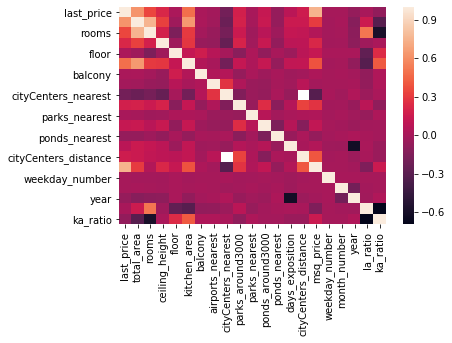

In [55]:
corr_matrix = data.drop(['total_images', 'first_day_exposition', 'floors_total',
                      'living_area', 'is_apartment', 'studio', 'open_plan', 'locality_name', 'loc_name','weekday_name',
                        'month_name', 'floor_name', 'sale_type'], axis = 1).corr()
sns.heatmap(corr_matrix)

Наиболее сильно цена квартиры зависит от площади (общей, жилой, площади кухни), следующим параметром является количество комнат и высота потолков. Также заметно влияние парков и прудов поблизости с квартирой.

**Рассмотрим подробнее влияние параметров - общая площадь, количество комнат и удаленность от центра.  
Для этого построим графики зависимости этих параметров.**

Построим график зависимости цены и количества комнат, предварительно создав сводную таблицу.

Создадим функцию для построения графика bar

In [56]:
def graph_bar(data, column, xlabel, ylabel, xsize, ysize):
    fig, ax = plt.subplots()
    column.plot(kind = 'bar', grid = True, figsize = (xsize, ysize))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

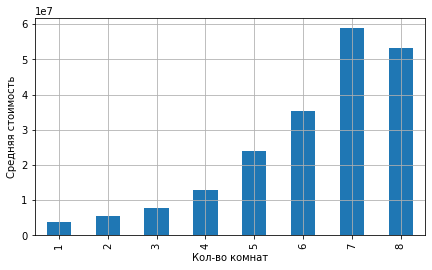

In [57]:
rooms_price = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean'])
rooms_price.columns = ['mean_last_price']
graph_bar(rooms_price, rooms_price['mean_last_price'], 'Кол-во комнат', 'Средняя стоимость', 7, 4)
plt.show()

С увеличением количества комнат средняя цена квартир пропорционально растет. При очень большом количестве комнат (>7) этот парметр теряет свое влияние на цену.

Построим диаграмму рассеяния между параметрами стоимость квадратного метра и площадь квартиры.

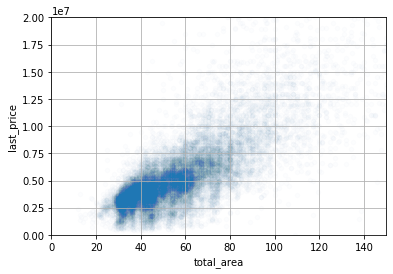

In [58]:
data.plot(x='total_area', y='last_price', kind='scatter', xlim=(0, 150), ylim=(0, 20000000), alpha=0.01, grid = True)
plt.show()

Из получившейся диаграммы рассеяния видно, что площадь также сильно влияет на цену - при увеличении площади, цена увеличивается.

Построим диаграмму рассеяния между параметрами цена и удаленность от центра.

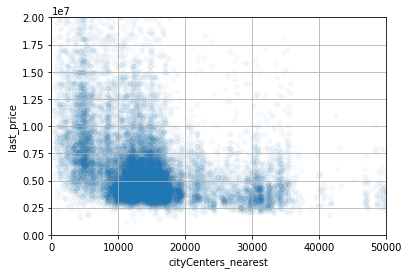

In [59]:
cityCenters_good.plot(x='cityCenters_nearest', y='last_price', kind='scatter', 
                      xlim=(0, 50000), ylim=(0, 20000000), alpha=0.03, grid = True
                     )
plt.show()

Из диаграммы видно, что наибольшее количество квартир находится на расстоянии 10-15 км от центра.  
При приближению к центру средняя стоимость квартир растет, но это является не основным параметром, влияющим на цену.

**Изучим зависимость цены кв.м. от того, на каком этаже расположена квартира: первом, последнем или другом.**

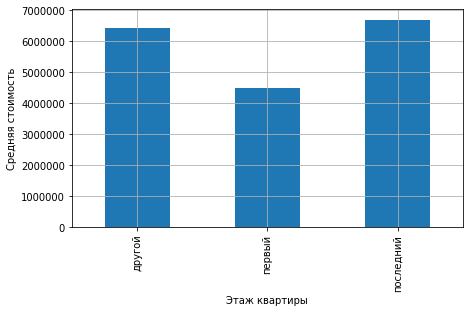

In [60]:
floor_apt = data.pivot_table(index='floor_name', values='last_price', aggfunc=['mean'])
floor_apt.columns = ['mean_last_price']
graph_bar(floor_apt, floor_apt['mean_last_price'], 'Этаж квартиры', 'Средняя стоимость', 7, 4)

Из графика видно, что средняя цена квартир, находящихся на первом этаже сильно ниже остальных квартир. 
Расположение квартиры на последнем этаже на цену не влияет.

**Изучим зависимость от даты размещения: дня недели, месяца и года.**

* Построим график зависимости средней цены продажи от года размещения объявления.

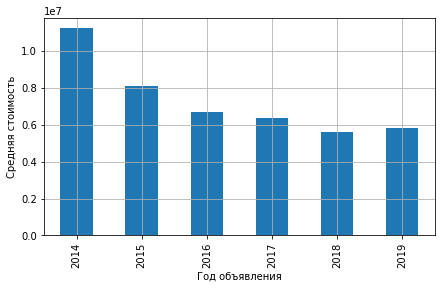

In [61]:
year_sale = data.pivot_table(index='year', values='last_price', aggfunc=['mean'])
year_sale.columns = ['mean_last_price']
graph_bar(year_sale, year_sale['mean_last_price'], 'Год объявления', 'Средняя стоимость', 7, 4)

Явно видно падение средних цен квартир на отрезке с 2014 года по 2018 год.  
Причина - стагнация российской экономики и снижение покупательской способности населения.
В 2019 году наметился небольшой рост, является ли это сменой тренда пока сказать нельзя.

* Построим график зависимости средней цены продажи от месяца размещения объявления.

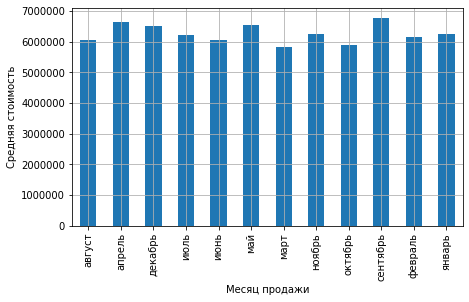

In [62]:
month_sale = data.pivot_table(index='month_name', values='last_price', aggfunc=['mean'])
month_sale.columns = ['mean_last_price']
graph_bar(month_sale, month_sale['mean_last_price'], 'Месяц продажи', 'Средняя стоимость', 7, 4)

Календарный месяц размещения объявления не сильно влияет на стоимость кв. метра недвижимости. Ярко выраженных тенденций не видно. Единственное, можно сказать, что максимальная средняя цена наблюдается в сентябре.

* Построим график зависимости средней цены продажи от дня размещения объявления.

Календарный месяц размещения объявления не сильно влияет на цену квартир. Ярко выраженных тенденций не видно. Единственное, можно сказать, что максимальная средняя цена наблюдается в сентябре, минимальная в марте и октябре.

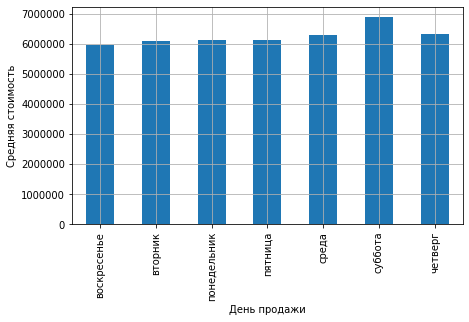

In [63]:
weekday_sale = data.pivot_table(index='weekday_name', values='last_price', aggfunc=['mean'])
weekday_sale.columns = ['mean_last_price']
graph_bar(weekday_sale, weekday_sale['mean_last_price'], 'День продажи', 'Средняя стоимость', 7, 4)

Наибольшую цену квартир указывают владельцы, размещающие объявления в субботу. Возможно это связано с психологическими факторами - напрмиер, если человек не торопится продавать квартиру, то он ждет субботу, чтобы сделать качественные фотографии квартиры и полностью заполнить объявление.

**Изучим 10 населённых пунктов с наибольшим числом объявлений.**

In [64]:
loc_name_stat = data.pivot_table(index='loc_name', values='msq_price', aggfunc=['count', 'mean'])
loc_name_stat.columns = ['count', 'mean_msq_price']
loc_name_stat = loc_name_stat.sort_values(by = 'count', ascending = False)
loc_name_stat_top = loc_name_stat.head(10)
loc_name_stat_top.sort_values(by = 'mean_msq_price', ascending = False)

,count,mean_msq_price
loc_name,,
Санкт-Петербург,13398,112212.392818
Пушкин,305,102113.701344
Кудрово,417,94168.389448
Парголово,297,89643.427172
Мурино,518,85114.842452
Шушары,403,77570.744541
Колпино,307,74884.831694
Всеволожск,335,68530.987463
Гатчина,267,67938.480112


* Санкт-Петербург ожидаемо оказался городом с самой высокой стоимостью квадратного метра жилья. На втором месте Пушкин - небольшой исторический город с большим количеством парков, находящийся на среднем удалении от Санкт-Петербурга. На третьем месте Кудрово - пригород Санкт-Петербурга с большим количеством новостроек.
* Самая низкая стоимость кв. метра недвижимости из ТОП-10 городов с наибольшим числом объявлений в Выборге. Объясняется большой удаленностью от Санкт-Петербурга и общей депрессивностью города. Аналогичная ситуация с Гатчиной, которая при этом не является историческим городом, но находится ближе к Санкт-Петербургу. 

**Изучим, что же является центром города в Санкт-Петербурге с точки зрения продавцов недвижимости**

Найдем центр города в Санкт-Петербурге с точки зрения продавцов недвижимости:  
* Для этого создадим столбец с расстоянием до центра в километрах: округлим его до целых значений, после этого посчитаем среднюю цену для каждого километра; 
* Построим график, который будет показывать как цена зависит от удалённости от центра;
* Определите границу, где график сильно меняется — это и будет центральная зона.

In [65]:
cityCenters_good['cityCenters_r'] = round(cityCenters_good['cityCenters_nearest'] / 1000)
cityCenters_good['cityCenters_r'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_r, dtype: float64

In [66]:
cityCenters_spb = cityCenters_good.query('locality_name == "Санкт-Петербург"')
cityCenters_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,cityCenters_distance,msq_price,weekday_number,weekday_name,month_number,month_name,year,floor_name,cityCenters_r
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,1,82920.79,3,четверг,3,март,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,558.0,1,408176.10,3,четверг,8,август,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,424.0,1,100000.00,4,пятница,7,июль,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,121.0,1,95065.79,1,вторник,6,июнь,2018,другой,8.0
6,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,NaN,1,87454.76,3,четверг,4,апрель,2019,другой,12.0


* Построим график, который будет показывать как цена зависит от удалённости от центра;

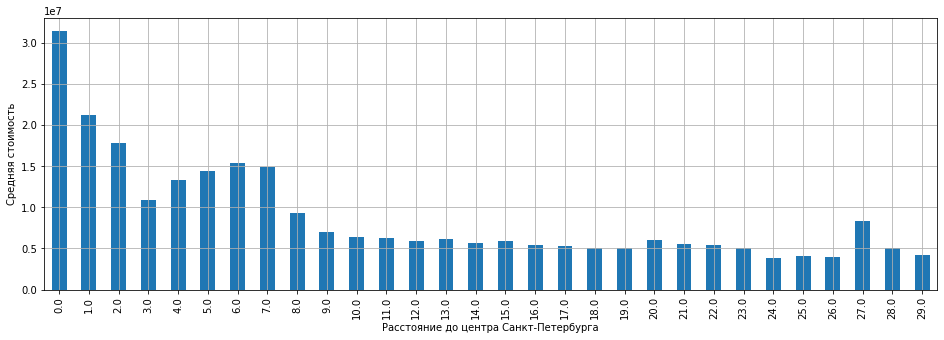

In [67]:
center_dist = cityCenters_spb.pivot_table(index='cityCenters_r', values='last_price', aggfunc=['mean'])
center_dist.columns = ['mean_last_price']
graph_bar(center_dist, center_dist['mean_last_price'], 'Расстояние до центра Санкт-Петербурга', 'Средняя стоимость', 16, 5)

In [77]:
center_dist

,mean_last_price
cityCenters_r,
0.0,3.144912e+07
1.0,2.121311e+07
2.0,1.785153e+07
3.0,1.091946e+07
4.0,1.327068e+07
5.0,1.438381e+07
6.0,1.532842e+07
7.0,1.483023e+07
8.0,9.283877e+06


* График зависимости цены от удалённости от центра ведет себя не линейно - средние цены после спада на 3км от центра Санкт-Петербурга начинают повышаться и только на 8км окончательно начинают движение вниз.  
* Скорее всего такое поведение графика обусловлено районами Крестовского и Васильевских островов, которые находятся на расстоянии 4-6 км от центра являюется местом концентрации недвижимости бизнес-класса. 

* Примем за центральную часть города радиус 3 км от центра. Создадим новый срез.

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Центр всё же в радиусе 3 км, это видно из графика, поправь 



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо

In [68]:
city_center = cityCenters_spb.query('cityCenters_r < 3')
city_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,cityCenters_distance,msq_price,weekday_number,weekday_name,month_number,month_name,year,floor_name,cityCenters_r
20,8,6500000.0,97.2,2015-10-31,2,NaN,3.0,46.5,1,NaN,...,265.0,1,86206.90,5,суббота,10,октябрь,2015,первый,2.0
120,8,96000000.0,317.0,2017-07-07,4,3.5,3.0,183.0,3,NaN,...,62.0,1,160000.00,4,пятница,7,июль,2017,последний,2.0
159,11,9000000.0,72.6,2018-09-08,2,2.9,5.0,43.2,4,NaN,...,NaN,1,94510.74,5,суббота,9,сентябрь,2018,другой,2.0
164,11,8700000.0,111.4,2016-10-10,4,3.1,4.0,73.2,2,NaN,...,791.0,1,82857.14,0,понедельник,10,октябрь,2016,другой,1.0
173,17,7950000.0,86.4,2019-04-24,4,NaN,3.0,52.7,1,NaN,...,NaN,1,148148.15,2,среда,4,апрель,2019,первый,2.0


**Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.**


* Построим совместную гистограмму площади квартир в центре и по всей выборке.

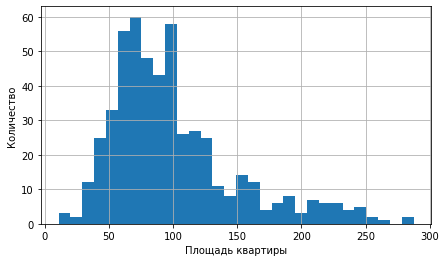

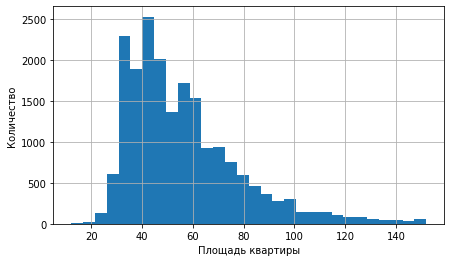

Средняя площадь квартиры в центре: 104.11
Средняя площадь квартиры по всей выборке: 58.85


In [69]:
graph_hist(city_center, city_center['total_area'], 30, 'Площадь квартиры', 'Количество')
plt.show()
graph_hist(data, data['total_area'], 30, 'Площадь квартиры', 'Количество')
plt.show()
print('Средняя площадь квартиры в центре: {:.2f}'.format(city_center['total_area'].mean()))
print('Средняя площадь квартиры по всей выборке: {:.2f}'.format(data['total_area'].mean()))

Средняя площадь квартиры в центре на 77% выше средней площади по всей выборке.

* Построим совместную гистограмму цены квартир в центре и по всей выборке.

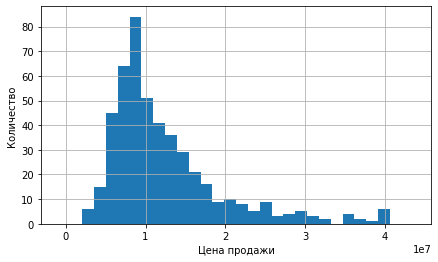

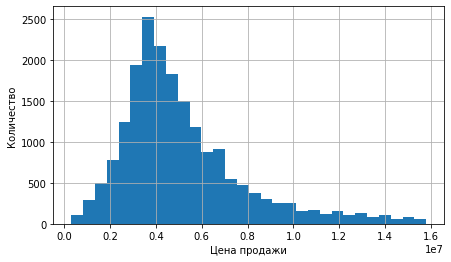

Средняя цена продажи квартиры в центре: 19771062.23
Средняя цена продажи квартиры по всей выборке: 6233296.36


In [70]:
graph_hist(city_center, city_center['last_price'], 30, 'Цена продажи', 'Количество')
plt.show()
graph_hist(data, data['last_price'], 30, 'Цена продажи', 'Количество')
plt.show()
print('Средняя цена продажи квартиры в центре: {:.2f}'.format(city_center['last_price'].mean()))
print('Средняя цена продажи квартиры по всей выборке: {:.2f}'.format(data['last_price'].mean()))

Средняя цена квартиры в центре в 3.2 раза выше средней цены по всей выборке.

* Построим гистограммы по числу комнат квартир в центре и по всей выборке.

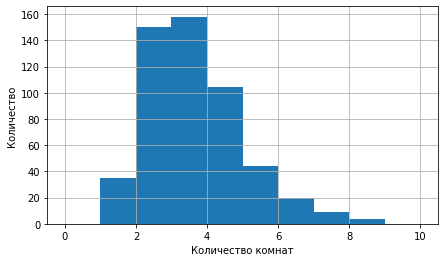

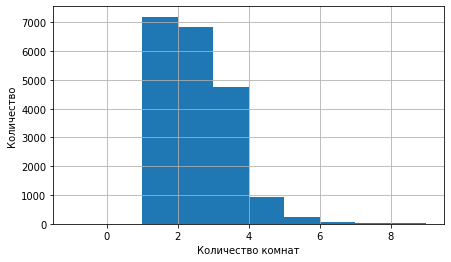

Среднее количество комнат в центре: 3.17
Среднее количество комнат по всей выборке: 2.04


In [71]:
graph_hist(city_center, city_center['rooms'], 10, 'Количество комнат', 'Количество')
plt.show()
graph_hist(data, data['rooms'], 10, 'Количество комнат', 'Количество')
plt.show()
print('Среднее количество комнат в центре: {:.2f}'.format(city_center['rooms'].mean()))
print('Среднее количество комнат по всей выборке: {:.2f}'.format(data['rooms'].mean()))

Среднее количество комнат в центре выше, чем по всей выборке - количество однокомнатных квартир намного меньше, а трехкомнатных больше, чем по всей выборке. Также больше количество пяти и шестикомнатных.

* Построим совместную гистограмму по высоте потолков в центре и по всей выборке.

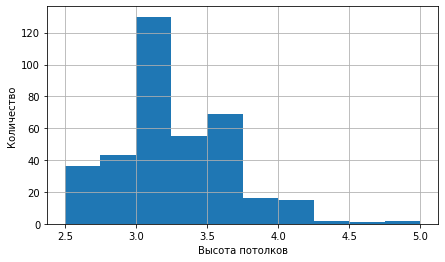

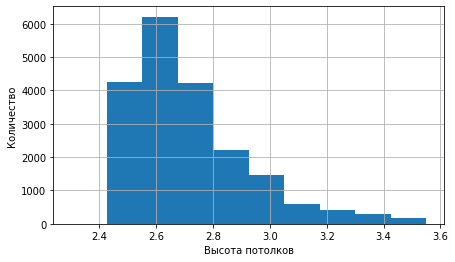

Средняя высота потолка в центре: 3.23
Средняя высота потолка по всей выборке: 2.72


In [72]:
graph_hist(city_center, city_center['ceiling_height'], 10, 'Высота потолков', 'Количество')
plt.show()
graph_hist(data, data['ceiling_height'], 10, 'Высота потолков', 'Количество')
plt.show()
print('Средняя высота потолка в центре: {:.2f}'.format(city_center['ceiling_height'].mean()))
print('Средняя высота потолка по всей выборке: {:.2f}'.format(data['ceiling_height'].mean()))

Средняя высота потолка в центре выше, чем по всей выборке - в центре очень мало квартир с потолками ниже 3 метров. Потолки высотой 3 метра скорее всего являются стандартом для дорогого жилья.

**Рассмотрим влияние параметров общая площадь, количество комнат и удаленность от центра. На стоимость квартир в центре города.  
Для этого построим графики зависимости этих параметров.**

* Сравним два графика зависимости цены от количества комнат для квартир в центре и по всей выборке.

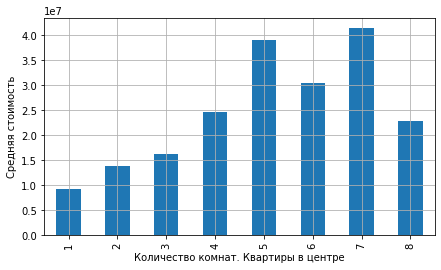

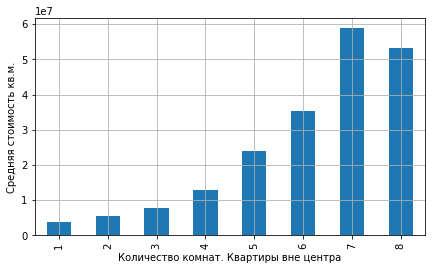

Корреляция между ценой и количеством комнат в центре: 0.23
Корреляция между ценой и количеством комнат по всей выборке: 0.34
Среднее количество комнат в квартирах в центре: 3.17
Средняя количество комнат в квартирах по всей выборке: 2.04


In [73]:
city_center_rooms_price = city_center.pivot_table(index='rooms', values='last_price', aggfunc=['mean'])
city_center_rooms_price.columns = ['mean_last_price']

graph_bar(city_center_rooms_price, city_center_rooms_price['mean_last_price'], 'Количество комнат. Квартиры в центре', 'Средняя стоимость', 7, 4)
plt.show()
graph_bar(rooms_price, rooms_price['mean_last_price'], 'Количество комнат. Квартиры вне центра', 'Средняя стоимость кв.м.', 7, 4)
plt.show()


print('Корреляция между ценой и количеством комнат в центре: {:.2f}'.format(city_center['rooms'].corr(city_center['last_price'])))
print('Корреляция между ценой и количеством комнат по всей выборке: {:.2f}'.format(data['rooms'].corr(data['last_price'])))
print('Среднее количество комнат в квартирах в центре: {:.2f}'.format(city_center['rooms'].mean()))
print('Средняя количество комнат в квартирах по всей выборке: {:.2f}'.format(data['rooms'].mean()))

Стоимость квартир в центре меньше зависит от количества комнат, чем стоимость квартир в остальных частях города.  
В центре среднее количество комнат в квартире 3.17, в остальных районах города 2.04 - это очень большая разница, сильно характеризующая разницу продаваемой недвижимости.

* Сравним два графика зависимости цены от этажа для квартир в центре и по всей выборке.

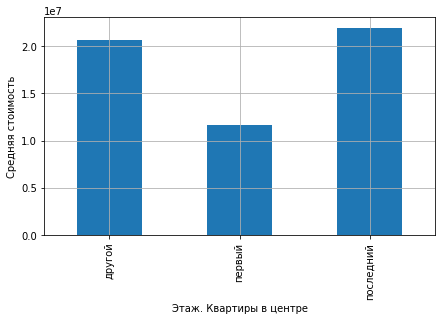

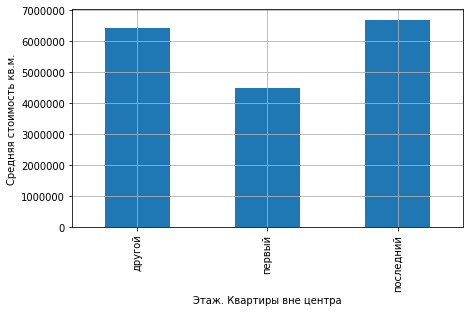

In [74]:
city_center_floor = city_center.pivot_table(index='floor_name', values='last_price', aggfunc=['mean'])
city_center_floor.columns = ['mean_last_price']

graph_bar(city_center_floor, city_center_floor['mean_last_price'], 'Этаж. Квартиры в центре', 'Средняя стоимость', 7, 4)
plt.show()
graph_bar(floor_apt, floor_apt['mean_last_price'], 'Этаж. Квартиры вне центра', 'Средняя стоимость кв.м.', 7, 4)
plt.show()

Визуально графики зависимости цены от количества комнат недвижимости в центре и во всей выборке отличаются не сильно, но в центре квартиры на первом ценятся еще меньше, чем по всей выборке.

* Сравним два графика зависимости цены от года продажи для квартир в центре и по всей выборке.

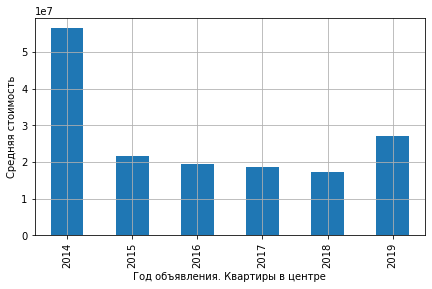

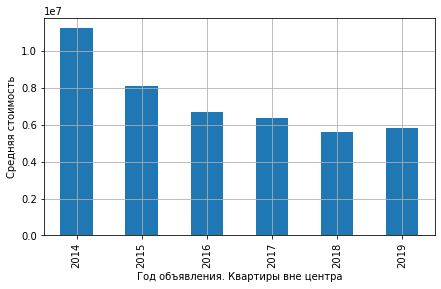

In [75]:
city_center_year = city_center.pivot_table(index='year', values='last_price', aggfunc=['mean'])
city_center_year.columns = ['mean_last_price']

graph_bar(city_center_year, city_center_year['mean_last_price'], 'Год объявления. Квартиры в центре', 'Средняя стоимость', 7, 4)
plt.show()
graph_bar(year_sale, year_sale['mean_last_price'], 'Год объявления. Квартиры вне центра', 'Средняя стоимость', 7, 4)
plt.show()

Кризис 2014 года намного сильнее повлиял на цены недвижимости в центре, чем на квартиры по всей выборке - средние цены упали практически в 2.5 раза и держались на одном уровне вплоть до 2019 года.  
Однако в 2019 году на рынке дорогой недвижимости наметился заметный подъем, в отличие от рынка массового жилья.

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Посмотрим как изменятся результаты при изменении границ центральной зоны


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Просто класс! Очень здорово и детально, работа проделана колоссальная, продолжай в том же духе


### Шаг 5. Общий вывод

* В процессе анализа рынка недвижимости Санкт-Петербурга и ЛО были выявлены слишком быстрые (быстрее, чем за неделю) и слишком долгие продажи квартир (дольше 1 года). Общая доля слишком быстрых продаж около 2 процентов от выборки, продаж дольше года около 15% от выборки.  
* Несмотря на то, что корреляция цены и длительности продажи по всей выборке близка к нулю, влияние цены на дительность продажи заметно в случае очень быстрой или долгой продажи недвижимости - квартиры, проданные быстрее, чем за 7дней на 8% дешевле стандартных. Проданные дольше, чем за 365 дней, дороже стандартно проданных квартир на 30%

* Проанализированы параметры, влияющие на стоимость недвижимости:  
    1) общая площадь квартиры и количество комнат - чем больше площадь, тем дороже в целом квартира;  
    2) расположение на первом или других этажах - первый этаж сильно снижает стоимость недвижимости, расположение на последнем этаже не влияет на цену;  
    3) район расположения квартиры - в центре дороже, чем на окраине;  
    4) общая экономическая ситуация в стране - в кризис квартиры продать сложнее;  
    5) высота потолков - чем выше потолки, тем дороже квартира. Потолки высотой 3 метра являются стандартном в дорогом жилье;  
    6) Наличие рядом парков - этот параметр входит в пятерку по величине корреляции с ценой, но в целом она не очень высокая.
    
* Выделен центральный район Санкт-Петербурга, и проведено сравнение параметров квартир, находящихся в центре и по всей выборке:  
    1) В центре квартиры больше по площади с большим количеством комнат и намного дороже квартир на окраине;  
    2) Цена квартир в центре не так сильно зависит от количества комнат, чем квартиры на окраине;  
    3) Высота потолков выше, чем квартирах на окраине;    
    4) Квартиры на первом этаже ценятся еще меньше остальных квартир;  
    5) На продажу недвижимости в центре намного сильнее повлиял кризис 2014 года, но в 2019 году начался достаточно резкий подъем, в отличие от остальных районов города;  
    



<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Работа хорошая, но стоит исправить обозначенные неточности, буду ждать исправленный вариант


<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)